## Memasukan Library ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## LOAD DATASET ##

In [4]:
data = pd.read_csv('dataset_topic.csv')
data.head()

,teks,label
0,Dalam upaya untuk mewujudkan kedaulatan pangan...,1
1,Metode penelitian Sistem Monitoring Realtime J...,1
2,Penelitian terkait sistem pemantauan (monitori...,1
3,Penelitian yang menghasilkan paparan berupa te...,1
4,Jaringan sensor nirkabel menggunakan radio mod...,1


## PREPROCESSING ##

## 1. CASE FOLDING ##

In [5]:
import re

#membuat fungsi untuk case folding (pembersihan data)

def casefolding(text):
    text = text.lower()                             #merubah kalimat menjadi huruf kecil
    text = re.sub(r'[-+]?[0-9]+','',text)           #menghapus angka
    text = re.sub(r'[^\w\s]', '', text)             #menghapus simbol/tanda baca
    text = text.strip()                             #menghapus spasi awal dan akhir
    return text

In [6]:
# membandingkan before after case folding

raw_sample = data['teks'].iloc[219]
case_folding = casefolding(raw_sample)

print('Raw Data \t : ', raw_sample)
print('Case Folding\t : ', case_folding)

Raw Data 	 :  Berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber Korea Selatan,
Case Folding	 :  berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber korea selatan


## 2. Filtering (STOPWORD REMOVAL)

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [8]:
# Membuat Fungsi Stopword Removal (Menghilangkan kata tidak penting)

def remove_stopword(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [9]:
raw_sample = data['teks'].iloc[219]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stopword(case_folding)

print('Raw Data\t\t : ', raw_sample)
print('Case Folding\t\t : ', case_folding)
print('Stop Word Removal\t: ', stopword_removal)

Raw Data		 :  Berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber Korea Selatan,
Case Folding		 :  berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber korea selatan
Stop Word Removal	:  berdasarkan analisis kuantitatif penulis dokumen strategi keamanan siber korea selatan


## 3. STEMMING

In [10]:
# Merubah kata menjadi kata dasar

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


# membuat stemming untuk bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [11]:
#Before after stemming

raw_sample = data['teks'].iloc[219]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stopword(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data\t\t : ', raw_sample)
print('Case Folding\t\t : ', case_folding)
print('Stop Word Removal\t: ', stopword_removal)
print('Stemming \t\t : ', text_stemming)

Raw Data		 :  Berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber Korea Selatan,
Case Folding		 :  berdasarkan analisis kuantitatif penulis terhadap dokumen strategi keamanan siber korea selatan
Stop Word Removal	:  berdasarkan analisis kuantitatif penulis dokumen strategi keamanan siber korea selatan
Stemming 		 :  dasar analisis kuantitatif tulis dokumen strategi aman siber korea selatan


## TEXT PREPROCESSING PIPELINE

In [12]:
# Menggabungkan Langkah langkah PREPROCESSING

def text_preprocessing(text):
    text = casefolding(text)
    text = remove_stopword(text)
    text = stemming(text)
    
    return text


In [13]:
%%time
data['clean_teks'] = data['teks'].apply(text_preprocessing)

CPU times: total: 1min 40s
Wall time: 1min 41s


In [14]:
data

,teks,label,clean_teks
0,Dalam upaya untuk mewujudkan kedaulatan pangan...,1,upaya wujud daulat pangan tulis inovasi teknol...
1,Metode penelitian Sistem Monitoring Realtime J...,1,metode teliti sistem monitoring realtime jarin...
2,Penelitian terkait sistem pemantauan (monitori...,1,teliti kait sistem pantau monitoring system ja...
3,Penelitian yang menghasilkan paparan berupa te...,1,teliti hasil papar temuantemuan metodologi sis...
4,Jaringan sensor nirkabel menggunakan radio mod...,1,jaring sensor nirkabel radio modem zigbee pros...
...,...,...,...
1544,Convolutional Neural Network dilatih untuk men...,3,convolutional neural network latih keluar metr...
1545,pre-processing,3,preprocessing
1546,Pre-procesing data input gambar wajah dan posi...,3,preprocesing data input gambar wajah posisi ta...
1547,Pendekatan berbasis Neural networks untuk peng...,3,dekat bas neural networks kenal wajah andal te...


In [15]:
# simpan clean_teks (sudah did preprocessing)
data.to_csv('clean_data.csv')

## FEAUTURE ENGINEERING

In [16]:
#Memisahkan kolom fitur dan label
x = data['clean_teks']
y = data['label']

In [17]:
x

0       upaya wujud daulat pangan tulis inovasi teknol...
1       metode teliti sistem monitoring realtime jarin...
2       teliti kait sistem pantau monitoring system ja...
3       teliti hasil papar temuantemuan metodologi sis...
4       jaring sensor nirkabel radio modem zigbee pros...
                              ...                        
1544    convolutional neural network latih keluar metr...
1545                                        preprocessing
1546    preprocesing data input gambar wajah posisi ta...
1547    dekat bas neural networks kenal wajah andal te...
1548                                        windows linux
Name: clean_teks, Length: 1549, dtype: object

In [18]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1544    3
1545    3
1546    3
1547    3
1548    2
Name: label, Length: 1549, dtype: int64

## Feature Extraction (TF-IDF dan N-Gram)

In [19]:
# save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#UNIGram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("Feautue_tf-idf.sav","wb"))

In [20]:
# Menampilkan vocabulary dari tf-idf

vec_TF_IDF.vocabulary_

{'upaya': 2409,
 'wujud': 2505,
 'daulat': 435,
 'pangan': 1600,
 'tulis': 2368,
 'inovasi': 893,
 'teknologi': 2245,
 'prototype': 1780,
 'purwarupa': 1793,
 'sistem': 2085,
 'mantu': 1333,
 'jaring': 978,
 'irigasi': 952,
 'desa': 471,
 'jides': 992,
 'bas': 213,
 'web': 2476,
 'akses': 46,
 'jenis': 990,
 'perangkat': 1648,
 'mana': 1322,
 'kembang': 1054,
 'single': 2075,
 'board': 275,
 'computer': 366,
 'sbc': 1974,
 'sensor': 2030,
 'milik': 1407,
 'jarak': 977,
 'deteksi': 481,
 'cm': 359,
 'model': 1423,
 'topologi': 2330,
 'mesh': 1390,
 'transmisi': 2344,
 'meter': 1396,
 'outdoor': 1576,
 'titik': 2312,
 'node': 1505,
 'metode': 1398,
 'teliti': 2254,
 'monitoring': 1439,
 'realtime': 1840,
 'konsep': 1129,
 'nirkabel': 1501,
 'ikut': 844,
 'tahap': 2205,
 'proses': 1770,
 'capai': 315,
 'hasil': 775,
 'harap': 768,
 'sistematis': 2086,
 'kait': 1013,
 'pantau': 1601,
 'system': 2197,
 'jsn': 1000,
 'varibel': 2436,
 'beda': 225,
 'sama': 1957,
 'papar': 1603,
 'temuantemua

In [21]:
# melihat jumlah feature

print(len(vec_TF_IDF.get_feature_names_out()))

2522


In [22]:
# melihat fitur apa saja yang ada dalam corpus

print(vec_TF_IDF.get_feature_names_out())

['abai' 'absolut' 'abstraksi' ... 'zigbee' 'zona' 'zone']


In [23]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())

data_tabular_tf_idf

,abai,absolut,abstraksi,acak,acara,acces,access,accessadalah,accesspre,accurate,...,ya,yaa,yaitulower,yanti,yogyakarta,yup,zain,zigbee,zona,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295804,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [24]:
data_tabular_tf_idf.iloc[10:20,60:70]

,alarm,alas,alat,alatalat,alert,algorithm,algorithms,algoritma,algoritmaalgoritma,algoritmanya
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [25]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=2000)
x_kbest_features = chi2_features.fit_transform(x_train,y_train)

# untuk reduced features

print('Original Feature Number' , x_train.shape[1])
print('Reduce Feature Number ', x_kbest_features.shape[1])

Original Feature Number 2522
Reduce Feature Number  2000


In [27]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,1.093088
1,0.261575
2,0.264514
3,0.219948
4,0.957375
...,...
2517,0.472942
2518,1.442341
2519,11.141604
2520,0.952346


In [28]:
# Menampilkan Feature beserta nilainya 

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,1.093088,abai
1,0.261575,absolut
2,0.264514,abstraksi
3,0.219948,acak
4,0.957375,acara
...,...,...
2517,0.472942,yup
2518,1.442341,zain
2519,11.141604,zigbee
2520,0.952346,zona


In [29]:
# Mengurutkan nilai fitur terbaik

Data.sort_values(by='Nilai',ascending=False)

,Nilai,Fitur
978,110.739124,jaring
1299,74.290891,lunak
426,72.788954,data
751,72.626579,guna
1648,72.431882,perangkat
...,...,...
1913,0.026317,risiko
2441,0.016218,versi
1471,0.011562,nali
687,0.010537,frekuensi


In [30]:
mask = chi2_features.get_support()
mask

array([ True, False, False, ...,  True,  True,  True])

In [31]:
# menampilkan fitur yang terpilih berdasarkan nilai mask/nilai tertinggi yang sudah ditetapkan pada chi square

new_feature =[]
for bool, f in zip(mask,feature):
    if bool :
        new_feature.append(f)
    selected_feature = new_feature
    
selected_feature

['abai',
 'acara',
 'acces',
 'access',
 'accessadalah',
 'accesspre',
 'acl',
 'active',
 'acu',
 'ad',
 'adaboost',
 'adaptasi',
 'adaptif',
 'address',
 'adhoc',
 'adi',
 'adil',
 'admin',
 'administrator',
 'adrian',
 'advanced',
 'agam',
 'agency',
 'aggregation',
 'agile',
 'agregasi',
 'agresi',
 'ahli',
 'ai',
 'aidriven',
 'air',
 'airflow',
 'airmas',
 'ajar',
 'akal',
 'akar',
 'akibat',
 'akses',
 'aksesibilitas',
 'aksi',
 'aktif',
 'aktifitas',
 'aktivitas',
 'aktual',
 'aku',
 'akuntabilitas',
 'akurasi',
 'akurat',
 'alam',
 'alamat',
 'alami',
 'alarm',
 'alas',
 'alatalat',
 'alert',
 'algorithm',
 'algorithms',
 'algoritma',
 'algoritme',
 'alir',
 'alliance',
 'allocation',
 'alokasi',
 'alur',
 'alya',
 'aman',
 'ambigu',
 'ambil',
 'amerika',
 'analis',
 'analisa',
 'analisis',
 'analitik',
 'analysis',
 'analyst',
 'analysts',
 'analytical',
 'analytics',
 'ancam',
 'ancang',
 'and',
 'andal',
 'aneka',
 'anggap',
 'anggar',
 'anggota',
 'angin',
 'angka',
 'angk

In [32]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
        
new_selected_feature

{'upaya': 2409,
 'daulat': 435,
 'pangan': 1600,
 'tulis': 2368,
 'inovasi': 893,
 'teknologi': 2245,
 'purwarupa': 1793,
 'sistem': 2085,
 'mantu': 1333,
 'jaring': 978,
 'irigasi': 952,
 'desa': 471,
 'jides': 992,
 'bas': 213,
 'web': 2476,
 'akses': 46,
 'jenis': 990,
 'perangkat': 1648,
 'mana': 1322,
 'kembang': 1054,
 'single': 2075,
 'board': 275,
 'computer': 366,
 'sbc': 1974,
 'sensor': 2030,
 'milik': 1407,
 'jarak': 977,
 'deteksi': 481,
 'cm': 359,
 'model': 1423,
 'topologi': 2330,
 'mesh': 1390,
 'transmisi': 2344,
 'meter': 1396,
 'outdoor': 1576,
 'titik': 2312,
 'node': 1505,
 'metode': 1398,
 'teliti': 2254,
 'monitoring': 1439,
 'realtime': 1840,
 'konsep': 1129,
 'nirkabel': 1501,
 'ikut': 844,
 'tahap': 2205,
 'proses': 1770,
 'capai': 315,
 'harap': 768,
 'pantau': 1601,
 'system': 2197,
 'jsn': 1000,
 'varibel': 2436,
 'beda': 225,
 'sama': 1957,
 'temuantemuan': 2263,
 'metodologi': 1399,
 'otomatis': 1570,
 'manfaat': 1328,
 'general': 717,
 'packet': 1585,
 

In [33]:
len(new_selected_feature)

2000

In [34]:
pickle.dump(new_selected_feature, open("new_selected_feature_tf-idf.sav","wb"))

In [35]:
# menampilkan fitur fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,abai,acara,acces,access,accessadalah,accesspre,acl,active,acu,ad,...,xander,xbee,xss,yanti,yogyakarta,yup,zain,zigbee,zona,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295804,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## PEMBUATAN MODEL / MODELING DENGAN NAIVE BAYES

In [36]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
 # import library
 
 import random 
 from sklearn.model_selection import train_test_split
 
 # import algorithm naive bayes
 
 from sklearn.naive_bayes import MultinomialNB
 

In [38]:
x = selected_x
y = data.label

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [39]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X-Train : ', len(x_train))
print('Banyaknya Y-Train : ', len(y_train))
print('Banyaknya X-Test : ', len(x_test))
print('Banyaknya Y-Test : ', len(y_test))

Banyaknya X-Train :  1239
Banyaknya Y-Train :  1239
Banyaknya X-Test :  310
Banyaknya Y-Test :  310


In [40]:
# proses training dengan naive bayes
text_algorithm = MultinomialNB()

In [41]:
model = text_algorithm.fit(x_train,y_train)

In [42]:
# membuat model prediksi

data_input = ("Java salah satu bahasa pemrograman untuk mengembangkan perangkat lunak")
data_input = text_preprocessing(data_input)

# load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav","rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil==1):
    s = "Jaringan"
elif(hasil==2):
    s = "Perangkat Lunak"
else:
    s = "Data"
    
print("Hasil Prediksi : \n",s)

Hasil Prediksi : 
 Perangkat Lunak


In [43]:
# masukkan library yg dibutuhkan

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test,predicted)

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       1.00      0.84      0.92        83
           2       0.94      1.00      0.97        96
           3       0.93      0.98      0.95       131

    accuracy                           0.95       310
   macro avg       0.96      0.94      0.95       310
weighted avg       0.95      0.95      0.95       310



## Pembuata MODEL SVM


In [44]:
# import Algorithm SVC
from sklearn.svm import SVC


In [45]:

model_svm = SVC(kernel="linear",C=1.0,random_state=None)

In [46]:
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
pred = model_svm.predict(x_test)

pred

array([1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 2, 1, 3, 1,
       3, 2, 1, 1, 3, 3, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 2, 3, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 2, 1,
       3, 3, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 3, 2, 3, 1, 1, 1, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 3, 1, 1, 3, 3, 3,
       2, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1,
       2, 3, 2, 2, 3, 3, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 1,
       2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 3, 2, 1, 3, 3, 3, 3,
       3, 1, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3, 1, 3, 2, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 2, 2,
       3, 2, 1, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3,

In [48]:
# masukkan library yg dibutuhkan

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

CM = confusion_matrix(y_test,pred)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.97      0.92      0.94        83
           2       0.96      0.95      0.95        96
           3       0.93      0.97      0.95       131

    accuracy                           0.95       310
   macro avg       0.95      0.94      0.95       310
weighted avg       0.95      0.95      0.95       310



In [49]:
#Mmenyimpan model
pickle.dump(model_svm,open("model_klasifikasi_svm.sav","wb"))

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# X_train: matriks fitur TF-IDF dari data latih
# y_train: label topik dari data latih
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)


MultinomialNB()

In [51]:
# X_test: matriks fitur TF-IDF dari data uji
# y_pred: prediksi topik dari data uji
y_pred = nb_model.predict(x_test)


In [52]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)

# Evaluasi lainnya (presisi, recall, F1-score)
report = classification_report(y_test, y_pred)


In [53]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9483870967741935
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.84      0.92        83
           2       0.94      1.00      0.97        96
           3       0.93      0.98      0.95       131

    accuracy                           0.95       310
   macro avg       0.96      0.94      0.95       310
weighted avg       0.95      0.95      0.95       310



In [54]:
# Contoh: Optimasi dengan mencoba variasi parameter alpha
nb_model_optimized = MultinomialNB(alpha=0.1)
nb_model_optimized.fit(x_train, y_train)


MultinomialNB(alpha=0.1)

C:\Users\parli\AppData\Local\Temp\ipykernel_2784\1511801551.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=metrics, palette="viridis")


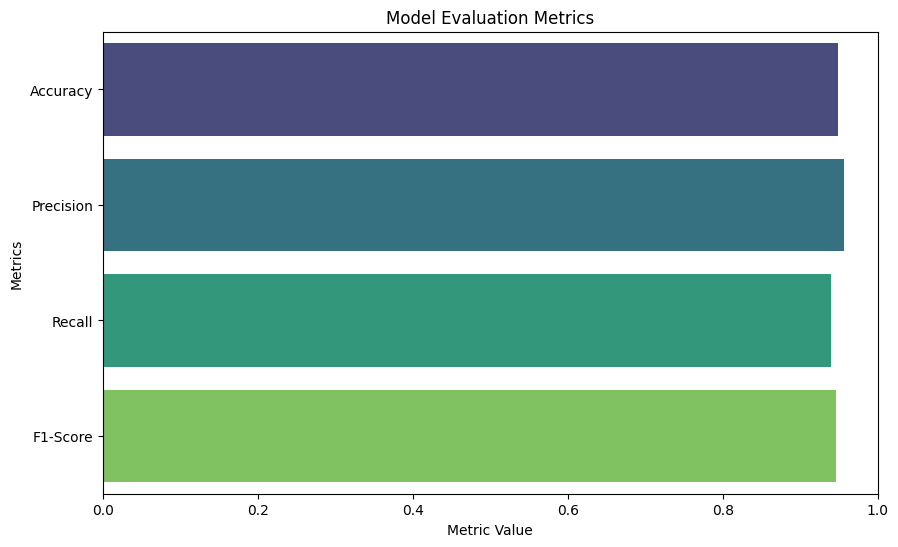

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Data evaluasi dari classification_report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Ekstrak metrik evaluasi
accuracy = report_dict['accuracy']
precision = report_dict['macro avg']['precision']
recall = report_dict['macro avg']['recall']
f1 = report_dict['macro avg']['f1-score']

# Plot diagram batang
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette="viridis")
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Metrics')
plt.xlim(0, 1)  # Set batas sumbu x antara 0 dan 1
plt.show()
